In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Exercise: Investigate High Paying Skills

In [6]:
# Getting data for Data Analyst in the US
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

# Clean NaN from salary year avg
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode the job_skills into list
df_DA_US = df_DA_US.explode('job_skills')

In [8]:
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [17]:
df_DA_US_group = df_DA_US.groupby('job_skills').agg(
    median_salary = ('salary_year_avg','median'),
    skill_count = ('job_skills','count')
)

# Option 2: df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['median','count'])

In [23]:
# Identify top 10 highest pay skills (salary) and top most in-demand skills (number of count)
# 1. Top pay:
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median_salary', ascending=False).head(10)

In [22]:
# 2. Top demand
df_DA_US_top_demand = df_DA_US_group.sort_values(by='skill_count', ascending=False).head(10)

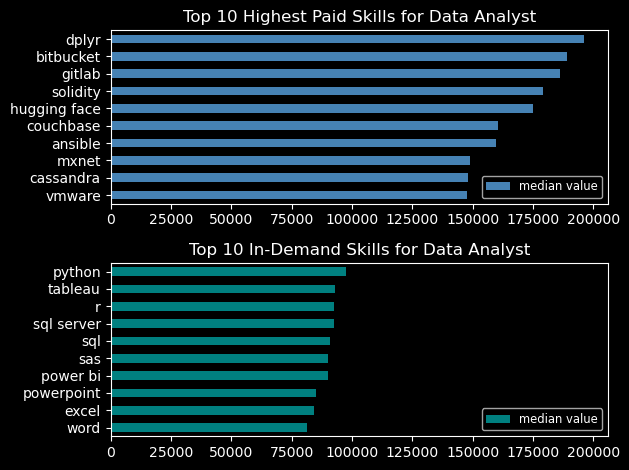

In [62]:
# Plotting to show:
# 1. Median salary of the hihest paid skills
# 2. Median salary of the most demanding skills

plt.style.use('dark_background')
fig,ax = plt.subplots(2,1)

df_DA_US_top_pay.plot(kind = 'barh', y='median_salary', ax=ax[0], label = 'median value', color = 'steelblue')
df_DA_US_top_demand.sort_values(by='median_salary', ascending=False).plot(kind='barh', y='median_salary',ax=ax[1], label = 'median value', color = 'teal')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

#Formatting:
# X value: set the 2nd plot to have the same x value range as 1st plot
ax[1].set_xlim(ax[0].get_xlim())

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend(loc='lower right', fontsize = 'small')  #move the legend to bottom right of the plot

ax[1].set_title('Top 10 In-Demand Skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='lower right', fontsize = 'small')  #move the legend to bottom right of the plot

fig.tight_layout()